# Audio Analytics

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import pandas as pd
from audio_data_generator import log_spectogram_signal, log_spectogram, AudioDataGenerator
from src.load_data import load_data, get_background_noise, get_data
import IPython.display as ipd

%matplotlib inline

Loading of the dataset

In [2]:
(x_train, y_train), (x_val, y_val), label_binarizer = load_data(path='./input/train/audio/', val_path='./input/train/validation_list.txt', control_balance=False)
background_noises = get_background_noise('./input/train/audio/_background_noise_')

# Label Distribution

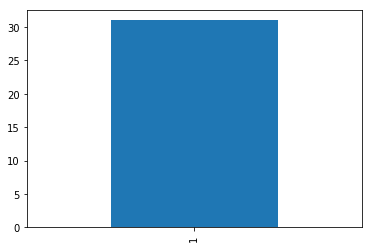

In [14]:
raw_data = get_data('./input/train/audio/')

s = raw_data.groupby("word").word.agg(lambda x:len(x.unique()))
pd.value_counts(s).plot(kind="bar")

# Log spectrogram Comparison
Comparing log spectrograms built with librosa vs scipy.signal, this was performed to see if there were any meaningful differences between the two.

In [17]:
SAMPLE_RATE = 16000
TARGET_DURATION = 16000

audio_gen = AudioDataGenerator()
wav_path = x_train.iloc[187]
audio = audio_gen.preprocess(wav_path, train=False)

log_spect = log_spectogram_signal(wav_path)
log_spect = log_spect.reshape(log_spect.shape[0], log_spect.shape[1])
log_spect_librosa = log_spectogram(audio)
log_spect_librosa = log_spect_librosa.reshape(log_spect_librosa.shape[0], log_spect_librosa.shape[1])

In [18]:
print('Log Spectrogram using Signal shape:' + str(log_spect.shape))
print('Log Spectrogram using Librosa shape:' + str(log_spect_librosa.shape))

Log Spectrogram using Signal shape:(99, 161)
Log Spectrogram using Librosa shape:(161, 101)


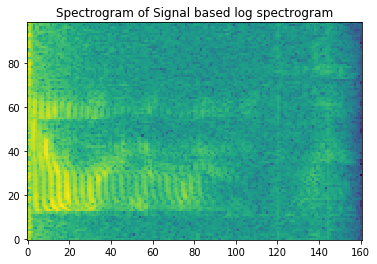

In [19]:
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('Spectrogram of Signal based log spectrogram')
plt.show()

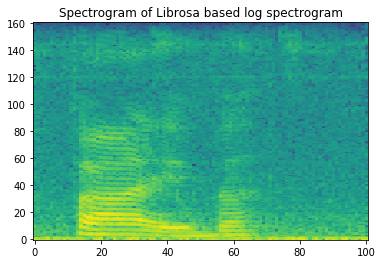

In [20]:
plt.imshow(log_spect_librosa, aspect='auto', origin='lower',)
plt.title('Spectrogram of Librosa based log spectrogram')
plt.show()

# Preprocessing visualisations
Visualisations of preprocessing steps on spectrograms

## Time-Shift

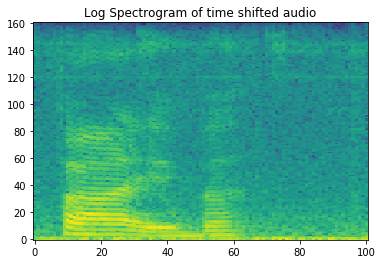

In [21]:
preprocessed = audio_gen.preprocess(wav_path, train=False)
ms = 16
time_shift_ms = 100
time_shift_dist = int(np.random.uniform(-(time_shift_ms * ms), (time_shift_ms * ms)))
preprocessed = np.roll(audio, time_shift_dist)

time_shift_spect = log_spectogram(preprocessed)
time_shift_spect = time_shift_spect.reshape(time_shift_spect.shape[0], time_shift_spect.shape[1])
plt.imshow(time_shift_spect, aspect='auto', origin='lower',)
plt.title('Log Spectrogram of time shifted audio')
plt.show()

## Background Noise

In [28]:
preprocessed = audio_gen.preprocess(wav_path, train=False)
ipd.Audio(preprocessed, rate=16000)

In [29]:
background_noise_file = background_noises[np.random.randint(len(background_noises))]

bg_audio = librosa.load(background_noise_file, sr=SAMPLE_RATE)[0]

bg_audio_start_idx = np.random.randint(bg_audio.shape[0] - TARGET_DURATION)
bg_audio_slice = bg_audio[bg_audio_start_idx : bg_audio_start_idx+16000] * np.random.uniform(0, 0.1)

bg_audio = preprocessed + bg_audio_slice

ipd.Audio(bg_audio, rate=16000)

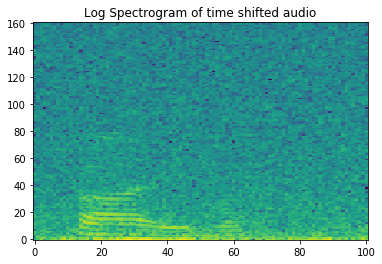

In [30]:
bg_spect = log_spectogram(bg_audio)
bg_spect = bg_spect.reshape(bg_spect.shape[0], bg_spect.shape[1])
plt.imshow(bg_spect, aspect='auto', origin='lower',)
plt.title('Log Spectrogram of time shifted audio')
plt.show()

## Time Stretching

In [50]:
preprocessed = audio_gen.preprocess(wav_path, train=False)

ipd.Audio(preprocessed, rate=16000)

In [54]:
time_stretched = librosa.effects.time_stretch(audio, 1.2)
ipd.Audio(time_stretched, rate=16000)

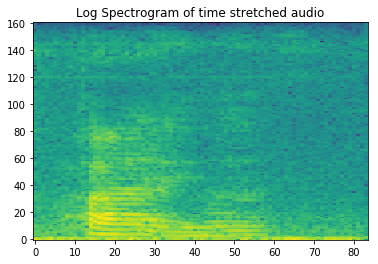

In [55]:
time_stretch = log_spectogram(time_stretched)
time_stretch = time_stretch.reshape(time_stretch.shape[0], time_stretch.shape[1])
plt.imshow(time_stretch, aspect='auto', origin='lower',)
plt.title('Log Spectrogram of time stretched audio')
plt.show()

## Pitch Shifting

In [41]:
preprocessed = audio_gen.preprocess(wav_path, train=False)

ipd.Audio(preprocessed, rate=16000)

In [49]:
pitch_shifted = librosa.effects.pitch_shift(audio, sr=SAMPLE_RATE, n_steps=-2)
ipd.Audio(pitch_shifted, rate=16000)

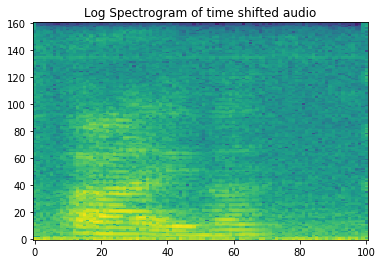

In [48]:
pitch_shift = log_spectogram(pitch_shifted)
pitch_shift = pitch_shift.reshape(pitch_shift.shape[0], pitch_shift.shape[1])
plt.imshow(pitch_shift, aspect='auto', origin='lower',)
plt.title('Log Spectrogram of time shifted audio')
plt.show()

## Amplitude Scaling

In [1]:
preprocessed = audio_gen.preprocess(wav_path, train=False)

ipd.Audio(preprocessed, rate=16000)

NameError: name 'audio_gen' is not defined

In [ ]:
amp_scaled = audio * np.random.uniform(1.0 - multiplier, 1.0 + multiplier)
ipd.Audio(pitch_shifted, rate=16000)

# Feature Visualisations
Visualisations of all produced features e.g. MFCC, Log_spectrogram, Raw audio.